### MLML Seawater Intake

This notebook serves as a starting point for analysis of data from the MLML seawater intake, located just offshore of Moss Landing at 17m water depth.

These are the libraries that need to be imported.

In [66]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

We will use data from August 2016 because there is good coverage. The data file has dates in different formats, varaibles derived from sensor measurements and quality control flags.

In [63]:
filename = '2016-08.csv'
df = pd.read_csv(filename,parse_dates=[0,1])

In [64]:
df.head()

,utc_time,pst_time,unix_time,temp,temp_flg,cond,cond_flg,sal,sal_flg,fluor,...,osat_flg,tide,ph,ph_flg,phrawv,co2,temp_raw,cond_raw,fluoro_raw,trans_raw
0,2016-08-02 00:08:18,2016-08-01 16:08:18,1470096498,15.228153,9,0.959019,9,33.201665,9,6.694133,...,9,2.58,8.053234,9,2.693,NaN,NaN,NaN,NaN,NaN
1,2016-08-02 00:13:17,2016-08-01 16:13:17,1470096797,15.974306,9,0.967580,9,32.903808,9,6.643340,...,9,2.58,8.057628,9,2.694,NaN,NaN,NaN,NaN,NaN
2,2016-08-02 00:18:17,2016-08-01 16:18:17,1470097097,17.537585,1,0.991139,1,32.507648,1,2.078260,...,1,2.64,8.009297,1,2.683,NaN,NaN,NaN,NaN,NaN
3,2016-08-02 00:23:18,2016-08-01 16:23:18,1470097398,17.275320,1,0.994248,1,32.833492,3,2.122705,...,1,2.70,7.952179,1,2.670,NaN,NaN,NaN,NaN,NaN
4,2016-08-02 00:28:17,2016-08-01 16:28:17,1470097697,15.020288,1,0.954494,1,33.202816,1,1.284610,...,1,2.77,7.947785,1,2.669,NaN,NaN,NaN,NaN,NaN


The code below loops through different variables to 
1. create a subset of the data set based on quality control flags
2. plot the good data in this subset

The `ii` variable is `True` where all data meets quality control standards.

<IPython.core.display.Javascript object>


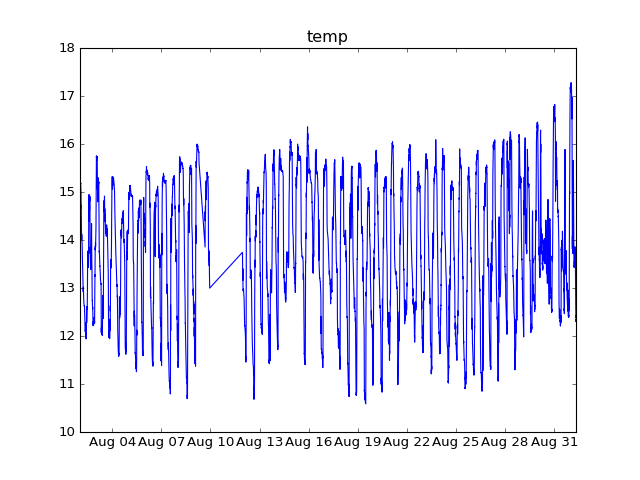

<IPython.core.display.Javascript object>


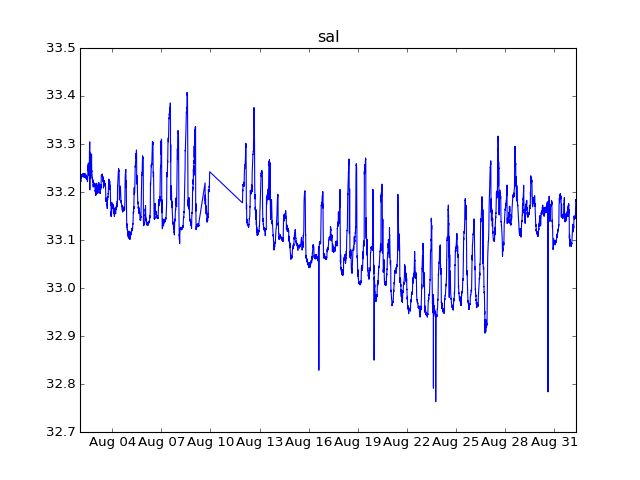

<IPython.core.display.Javascript object>


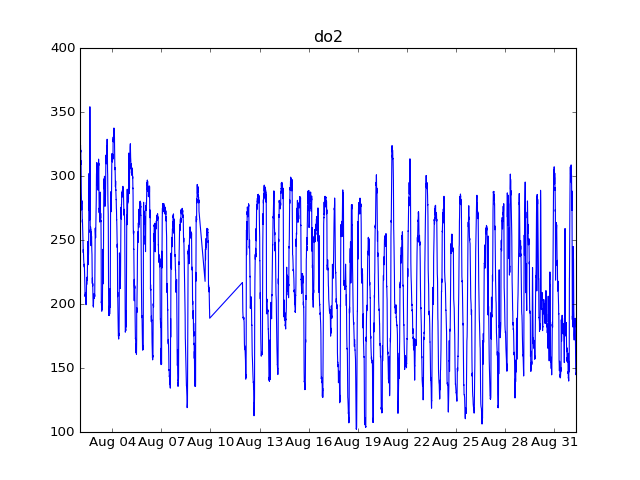

<IPython.core.display.Javascript object>


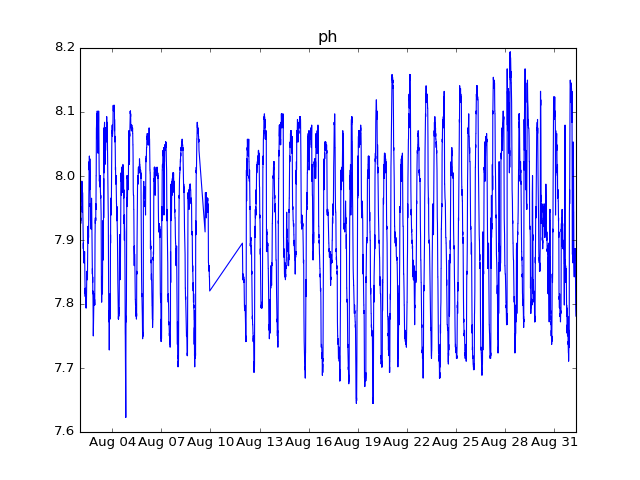

<IPython.core.display.Javascript object>


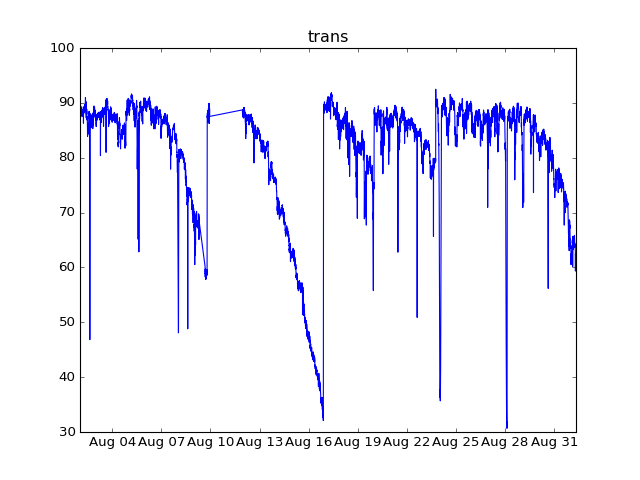

<IPython.core.display.Javascript object>


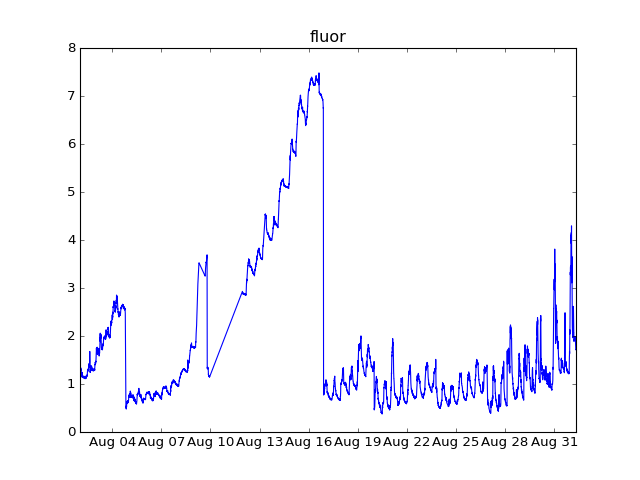

In [73]:
all_vars = ['temp','sal','do2','ph','trans','fluor']

# Determine indices of data that meets quality control thresholds
# (flag values are equal to 1)
ii = np.ones(np.shape(df['temp_flg']),dtype=bool)
for var in all_vars:
    goodi = df[var+'_flg']==1
    ii = ii & goodi 

# Plot the good data
for var in all_vars:
    plt.figure()
    plt.plot(df['utc_time'][ii],df[var][ii])
    plt.title(var)
    dfmt = dates.DateFormatter('%b %d')
    plt.gca().xaxis.set_major_formatter(dfmt)